In [110]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
# Read the data
df = pd.read_csv('Q1_data.csv')
data_arr = df[['market_cap', 'volume']].to_numpy()


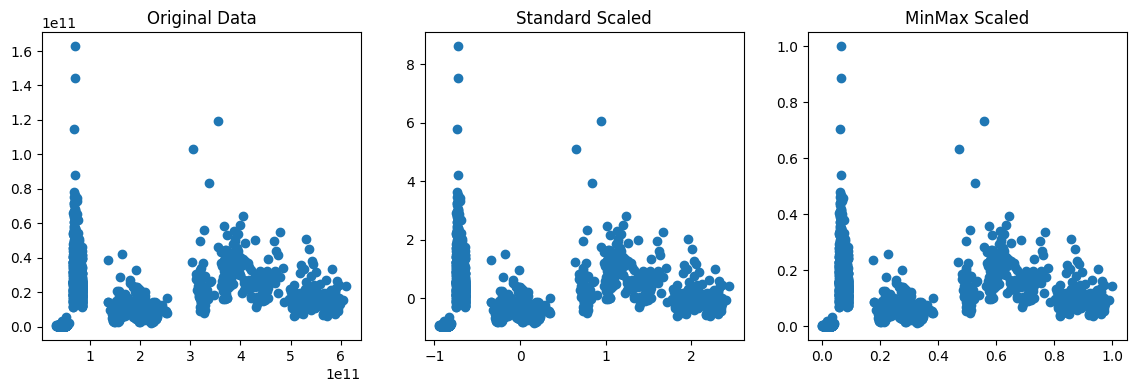

In [112]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_arr_std_scaled = std_scaler.fit_transform(data_arr)

minmax_scaler = MinMaxScaler()
data_arr_minmax = minmax_scaler.fit_transform(data_arr)

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

ax[0].set_title('Original Data'), ax[1].set_title('Standard Scaled'), ax[2].set_title('MinMax Scaled')

ax[0].scatter(data_arr[:, 0], data_arr[:, 1])
ax[1].scatter(data_arr_std_scaled[:, 0], data_arr_std_scaled[:, 1])
ax[2].scatter(data_arr_minmax[:, 0], data_arr_minmax[:, 1]);

#### We see that the original data does not require scaling  
#### Now let's fit the data with 5 clusters

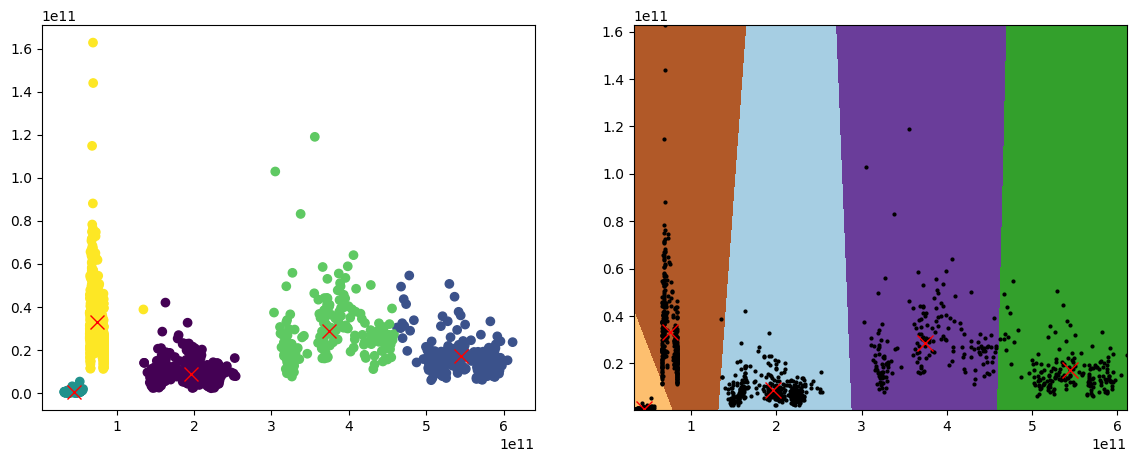

In [117]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5, n_init=10)
cluster.fit(data_arr)

h = 5000
x_min, x_max = data_arr[:, 0].min() - 1, data_arr[:, 0].max() + 1
y_min, y_max = data_arr[:, 1].min() - 1, data_arr[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, h), np.linspace(y_min, y_max, h))

Z = cluster.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

fig2, ax2 = plt.subplots(1, 2, figsize=(14, 5))
ax2[1].imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect="auto", origin="lower")
ax2[1].plot(data_arr[:, 0], data_arr[:, 1], "k.", markersize=4)
for x, y in cluster.cluster_centers_:
    ax2[1].plot(x, y, marker='x', markersize=12, color='r')

ax2[0].scatter(data_arr[:, 0], data_arr[:, 1], c=cluster.labels_)
for x, y in cluster.cluster_centers_:
    ax2[0].plot(x, y, marker='x', markersize=10, color='r')

### Let's evaluate different n_clusters

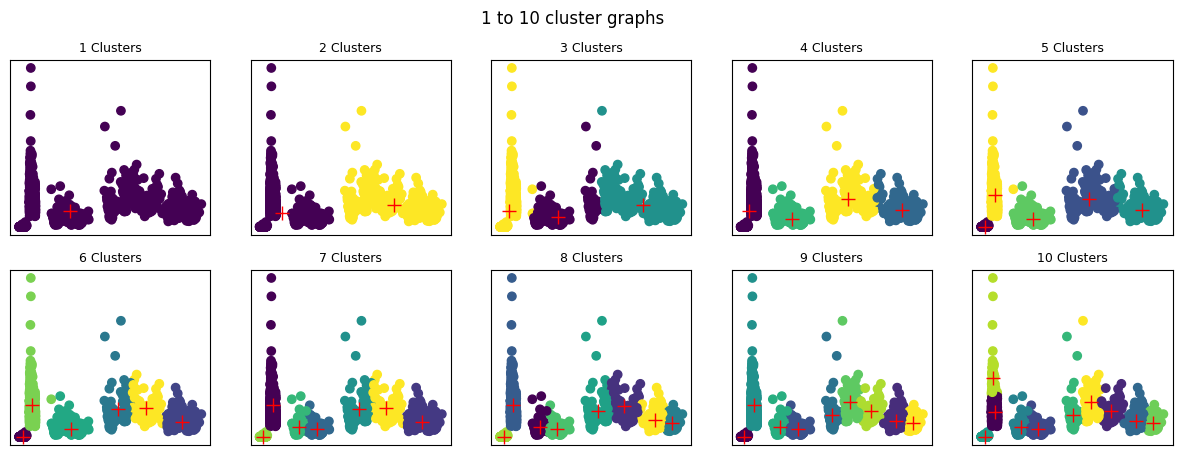

In [114]:
from sklearn.metrics import silhouette_score

inertia_list, silhouette_list = [], [None]

fig3, ax3 = plt.subplots(2, 5, figsize=(15, 5))
fig3.suptitle('1 to 10 cluster graphs')
ax3 = ax3.flatten()

for cluster_count in range(1, 11):
    cluster = KMeans(n_clusters=cluster_count, n_init=10)
    cluster.fit(data_arr)
    
    current_axis = ax3[cluster_count -1]
    current_axis.scatter(x=data_arr[:, 0], y=data_arr[:, 1], c=cluster.labels_)
    current_axis.set_title(f'{cluster_count} Clusters', size=9)
    current_axis.get_xaxis().set_visible(False), current_axis.get_yaxis().set_visible(False)
    
    for x, y in cluster.cluster_centers_:
        current_axis.plot(x, y, marker='+', markersize=10, color='r')

    if cluster_count > 1:
        silhouette_list.append(silhouette_score(data_arr, labels=cluster.labels_))
    inertia_list.append(cluster.inertia_)
    
metric_df = pd.DataFrame(zip(inertia_list, silhouette_list), index=range(1, 11), columns=['Inertia', 'Silhouette'])

## Draw metrics graph

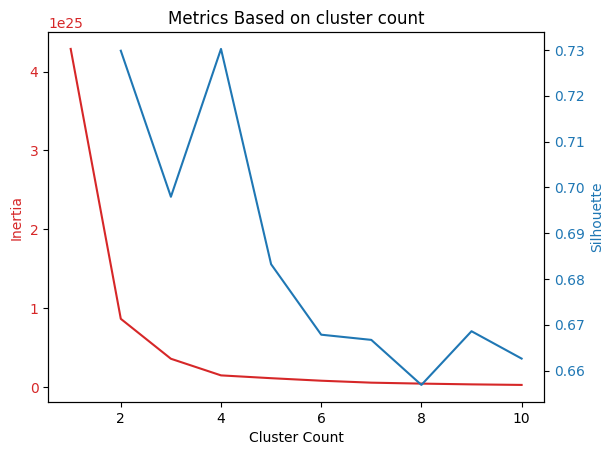

In [115]:
fig4, ax4 = plt.subplots()
ax4.set_title('Metrics Based on cluster count')
color = 'tab:red'
ax4.set_xlabel('Cluster Count')
ax4.set_ylabel('Inertia', color=color)
ax4.plot(metric_df.index, metric_df['Inertia'], color=color)
ax4.tick_params(axis='y', labelcolor=color)

ax4_twin = ax4.twinx()

color = 'tab:blue'
ax4_twin.set_ylabel('Silhouette', color=color)
ax4_twin.plot(metric_df.index, metric_df['Silhouette'], color=color)
ax4_twin.tick_params(axis='y', labelcolor=color)

**As you can see from the graph above, at 4 clusters Inertia starts to level off and Silhouette score is also high so we can conclude that 4 clusters is the sweet spot**

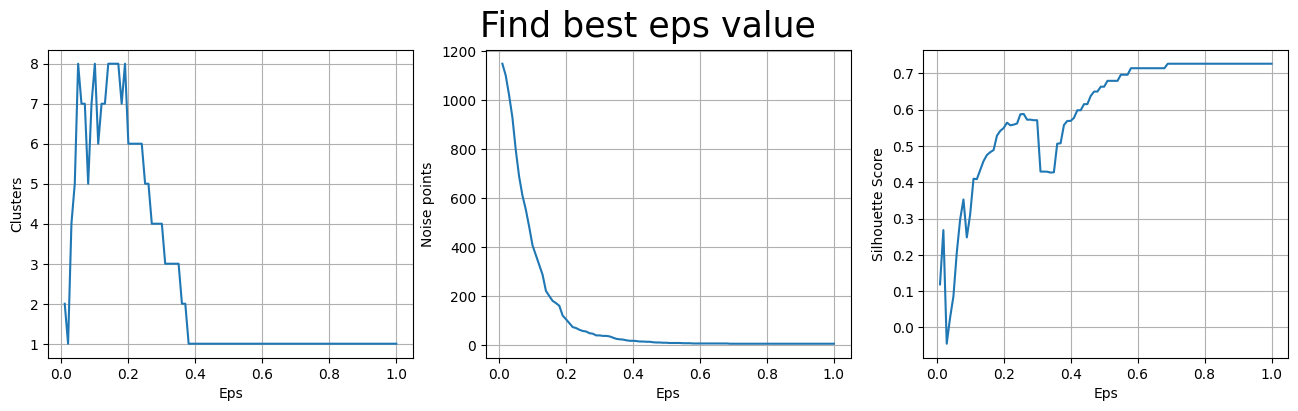

In [278]:
from sklearn.cluster import DBSCAN

eps_cluster_list = []
for eps in np.arange(0.01, 1.01, 0.01):
    db = DBSCAN(eps=eps, min_samples=15)
    db.fit(data_arr_std_scaled)
    n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    n_noise_ = list(db.labels_).count(-1)
    score = silhouette_score(data_arr_std_scaled, db.labels_)
    eps_cluster_list.append([eps, n_clusters_, n_noise_, score])
eps_cluster_list = np.array(eps_cluster_list)

fig5, ax5 = plt.subplots(1, 3, figsize=(16, 4))

fig5.suptitle('Find best eps value', size=25)
ax5[0].plot(eps_cluster_list[:, 0], eps_cluster_list[:, 1])
ax5[0].set_xlabel('Eps'), ax5[0].set_ylabel('Clusters')
ax5[1].plot(eps_cluster_list[:, 0], eps_cluster_list[:, 2])
ax5[1].set_xlabel('Eps'), ax5[1].set_ylabel('Noise points')
ax5[2].plot(eps_cluster_list[:, 0], eps_cluster_list[:, 3])
ax5[2].set_xlabel('Eps'), ax5[2].set_ylabel('Silhouette Score')
ax5[0].grid(), ax5[1].grid(), ax5[2].grid();

number of clusters: 5
number of noise points: 58


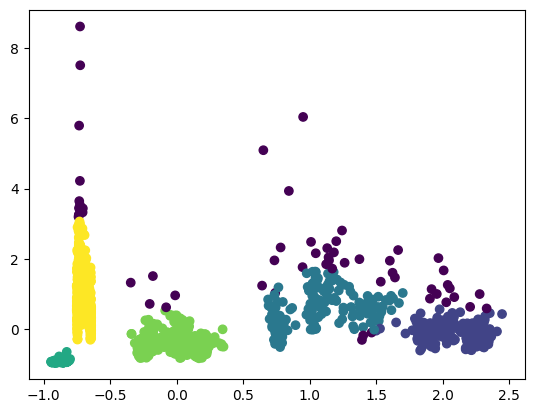

In [277]:
db = DBSCAN(eps=0.25, min_samples=15)
db.fit(data_arr_std_scaled)

n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)
print(f"number of clusters: {n_clusters_}")
print(f"number of noise points: {n_noise_}")
plt.scatter(data_arr_std_scaled[:, 0], data_arr_std_scaled[:, 1], c=db.labels_);